# **Machine Learning Case Study: predicting minimum cost of a bank's telemarketing campaign**
### A Data Science approach to predict the best candidates to be targeted for a marketing campaign

### **About the project**

This Machine Learning project is based on the 2014 original study: "A data-driven approach to predict the success of bank telemarketing" (can be found [here](https://www.sciencedirect.com/science/article/pii/S016792361400061X?via%3Dihub)) in which the authors conducted a Data Mining (DM) project to predict the success of telemarketing calls for selling bank long-term deposits of a Portuguese retail bank.

_Source: [Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014_

### **Dataset Information**

The dataset used for the current case study has 41188 samples and 16 inputs. 

- bank_marketing_campaign.csv can be downloaded [here](https://bit.ly/31a0EAL).

There are also 4 original datasets:

- bank-additional-full.csv with all examples (41188) and 20 inputs, ordered by date (from May 2008 to November 2010), very close to the data analyzed in [Moro et al., 2014]
- bank-additional.csv with 10% of the examples (4119), randomly selected from 1), and 20 inputs.
- bank-full.csv with all examples and 17 inputs, ordered by date (older version of this dataset with less inputs).
- bank.csv with 10% of the examples and 17 inputs, randomly selected from 3 (older version of this dataset with less inputs).

You can download the zip file (4 datasets) [here](https://archive.ics.uci.edu/ml/machine-learning-databases/00222/). The smallest datasets are provided to test more computationally demanding machine learning algorithms (e.g., SVM). The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).

### **Attribute Information**

The dataset contains information about all customers targeted by the campaign. Next, all the input variables:

##### Bank client data:
1. age (numeric)
2. job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3. marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4. education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5. default: has credit in default? (categorical: 'no','yes','unknown')
6. housing: has housing loan? (categorical: 'no','yes','unknown')
7. loan: has personal loan? (categorical: 'no','yes','unknown')

##### Other attributes:
8. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
9. previous: number of contacts performed before this campaign and for this client (numeric)
10. poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

##### Social and economic context attributes:
11. emp.var.rate: employment variation rate - quarterly indicator (numeric)
12. cons.price.idx: consumer price index - monthly indicator (numeric)
13. cons.conf.idx: consumer confidence index - monthly indicator (numeric)
14. euribor3m: euribor 3 month rate - daily indicator (numeric)
15. nr.employed: number of employed citizens - quarterly indicator (numeric)

##### Output variable (desired target):
16. y - has the client subscribed a term deposit? (binary: 'yes','no')

### **The current case study**

From the data collected between 2008 and 2015, which includes data related with the recent financial global crisis that severely affected Portugal, the dataset stores information of a direct marketing campaign (phone calls) developed and implemented by the bank's marketing department in order to attract customers to subscribe term deposits, collecting and classifying the results as a binary categorical label: 'yes' and 'no'.

Until that time, their communication strategy was to reach the maximum number of clients, indiscriminately, and try to sell them the financial product over the phone. However, that approach, in addition to spending more resources because it would involve having several people calling all customers and also it used to consume a lot of time, it was also very uncomfortable for a vast number of clients who was wishing not to be disturbed by this type of action.

In order to determine the costs for the campaign to be successful, the marketing team has reached to a conclusion:

- For each customer identified as a **good candidate** and therefore defined as a target of the campaign but doesn't subscribe the term deposit, the bank had a **cost of 500 EUR**.
- For each customer who was identified as a **bad candidate** and therfore excluded from the target of the campaign but was actually a good candidate and would subscribe the product, the bank had a **cost of 2000 EUR**.

### **Machine Learning problem and objectives**

We're facing a **binary classification problem**. Based on the above costs information, the goal is to train the best machine learning model that is able to predict and select the optimal number of candidates to be targeted by the campaign in order to reduce costs and maximizing efficiency.

### **Project structure**

The project is divided into three main categories:

1. **EDA:** Exploratory Data Analysis
2. **Data Wrangling:** Cleaning and Feature Engeneering
3. **Machine Learning:** Predictive Modelling

In this article, I'll be focusing only on the first section, the **Exploratory Data Analysis (EDA)**. EDA usually reveals important insights about the data that can be (and usually is) used to build the predictive model and it can also help the data scientist to clearly identify the cleaning and feature engeneering steps.

### **Performance Metric**

The performance metric in use for evaluation is the **total costs (EUR)** since the objective is to determine both minimum costs and maximum efficiency of the marketing campaign.

---

## Set-up

To get (download) the data, click or copy and past this URL in a browser: https://bit.ly/31a0EAL (monitorized link). The first thing to do is to import the libraries and dependencies required wich will be used to to explore and visualize the data, load the dataset (I will assign it as 'df') and inspect the first rows.

In [1]:
# import the libraries
import pandas as pd
from pandas.plotting import table
import numpy as np
import seaborn as sns
import scipy.stats

import matplotlib.pyplot as plt
%matplotlib inline

seed = 42

`read_csv` is a function of pandas to load/read files in csv format so we can perform some operations on it afterwards.

In [2]:
# Loading the datset
df = pd.read_csv('bank_marketing_campaign.csv')

`head()` is a method used to display the first 'n' rows in a dataframe. `tail()`will display the 'n' last rows.

In [3]:
# Visualization of the dataset (display the first 5 rows by default)
df.head()

,age,job,marital,education,default,housing,loan,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


As we can see above, the target or dependent variable (displyed on the right as the last column) labeled as 'y' is a binary categoric variable. So let's start by convert it into a binary numeric variable wich will take the value of 1 if the cliente has subscribed the term deposit and 0 if otherwise. A new column 'target' will replace the 'y' (to be droped). I will also rename some columns replacing the dots by underscores just to make it easier to type.

In [4]:
# Converting the target from binary/categoric into binary/numeric
df['target'] = df.apply(lambda row: 1 if row["y"] == "yes" else 0, axis=1)
df.drop(["y"],axis=1,inplace=True)

In [5]:
# Renaming some columns for better typing and calling variables
df.rename(columns={"emp.var.rate":"emp_var_rate",
                   "cons.price.idx":"cons_price_idx",
                   "cons.conf.idx":"cons_conf_idx",
                   "nr.employed":"nr_employed"}
          ,inplace=True)

In [6]:
df.head()

,age,job,marital,education,default,housing,loan,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,target
0,56,housemaid,married,basic.4y,no,no,no,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


### Basic info of the dataset

The first questions that need to be answered are the following: 
- How many features are available?
- How many clients are in the dataset?
- Are there any duplicated records?
- How many clients subscribed the term deposit and how many didn't? I will answer this last one both with absolute and percentual values.

In [8]:
# Printing number of observations, variables including the target, and duplicate samples
print(f"Number of clients: .............. {df.shape[0]}") # Number of observations
print(f"Number of variables: ............ {df.shape[1]} incl. target") # Number of variables or attributes
print(f"Number of duplicate entries: .... {df.duplicated().sum()}")

Number of clients: .............. 41188
Number of variables: ............ 16 incl. target
Number of duplicate entries: .... 5853


Since I cannot find any row that allows me to identify the contact, I must conclude that these apparent duplicated entries are in fact from people with the same profile.


[0] Number of clients that haven't subscribed the term deposit: ... 36548
[1] Number of clients that have subscribed the term deposit: ....... 4640



,clients,%
0,36548,88.73
1,4640,11.27


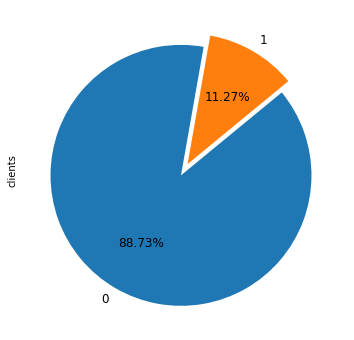

In [9]:
# How many clients have subscribed the term deposit and how many didn't?
absolut = df.target.value_counts().to_frame().rename(columns={"target":"clients"})
percent = (df.target.value_counts(normalize=True)*100).to_frame().rename(columns={"target":"%"})
df_bal = pd.concat([absolut,percent],axis=1).round(decimals=2)
print("")
print(f"[0] Number of clients that haven't subscribed the term deposit: ... {df.target.value_counts()[0]}")
print(f"[1] Number of clients that have subscribed the term deposit: ....... {df.target.value_counts()[1]}")
print("")
display(df_bal)
absolut.plot(kind='pie', subplots=True, autopct='%1.2f%%', 
             explode= (0.05, 0.05), startangle=80, 
             legend=False, fontsize=12, figsize=(14,6));

### The dataset is highly embalanced.
From the above information we can clearly state that the dataset is absolutely embalanced with the 0:'no' aproximately 8 times higher than 1:'yes'.

---

### **Exploratory Data Analysis (EDA)**

Let's now find out what type (and how many by type) of variables we're dealing with, check for missing values, correlations (pearson) as well as the statistical description of all variables (numerical and categorical). We'll be plotting, displaying and visualizing as much of the data as possible.

In [10]:
# Type of variables
df.dtypes.sort_values(ascending=True)

age                 int64
pdays               int64
previous            int64
target              int64
emp_var_rate      float64
cons_price_idx    float64
cons_conf_idx     float64
euribor3m         float64
nr_employed       float64
job                object
marital            object
education          object
default            object
housing            object
loan               object
poutcome           object
dtype: object

In [11]:
# Counting variables by type
df.dtypes.value_counts(ascending=True) 

int64      4
float64    5
object     7
dtype: int64

In [12]:
# Detecting missing values
display(df.isnull().sum())
print("")
print(f"Are there any missing values? {df.isnull().values.any()}") 

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
target            0
dtype: int64


Are there any missing values? False


In [13]:
# Overview of shape, attributes, types and missing values
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   pdays           41188 non-null  int64  
 8   previous        41188 non-null  int64  
 9   poutcome        41188 non-null  object 
 10  emp_var_rate    41188 non-null  float64
 11  cons_price_idx  41188 non-null  float64
 12  cons_conf_idx   41188 non-null  float64
 13  euribor3m       41188 non-null  float64
 14  nr_employed     41188 non-null  float64
 15  target          41188 non-null  int64  
dtypes: float64(5), int64(4), object(7)
memory usage: 5.0+ MB


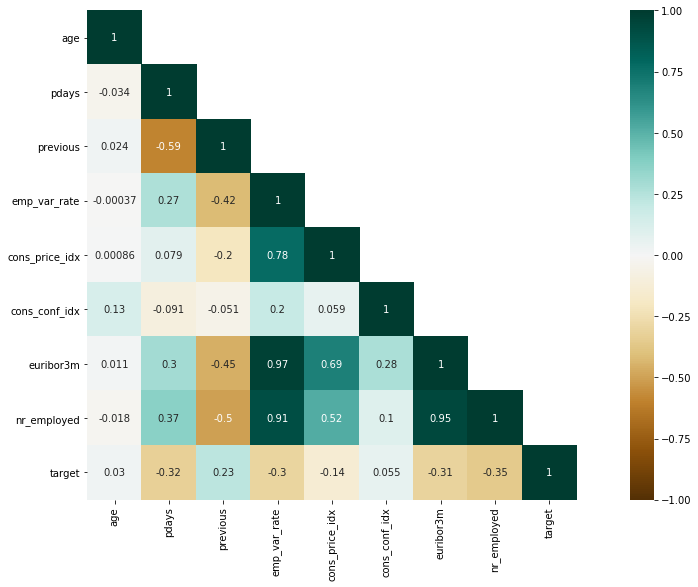

In [14]:
# Visualization of correlations (heatmap)
mask = np.triu(df.corr(), 1)
plt.figure(figsize=(19, 9))
sns.heatmap(df.corr(), annot=True, vmax=1, vmin = -1, square=True, cmap='BrBG', mask=mask);

Let's now make some interpretations and take some preliminary conclusions about the dataset (both numeric and categorical features) in order to have a clear and more accurate sense about the data.

In [15]:
# General stats of numeric variables
describe = df.describe()
describe.append(pd.Series(df.var(), name='variance'))

,age,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,target
count,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.024060,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654
std,10.421250,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173
min,17.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000
variance,108.602451,34935.687284,0.244927,2.467915,0.335056,21.420215,3.008308,5220.283250,0.099966


`age:`the youngest client has 17 years old and the oldest has 98 years with a median of 38 years whilst the average is 40 years old

`pdays:`The majority of the clients have the 999 number wich indicates that most people did not contact nor were contacted by the bank. Those are considered to be 'out of range' values

`previous:`The vast majority were never contacted before

`emp_var_rate:`during the period the index varied from [-3.4, 1.4]

`cons_price_idx:`the index varied from [92.2, 94.8]

`cons_conf_idx:`the consumer confidence level during that period kept always negative with a range of variation of [-51, -27]. These negative values might be explained by the recession that severely affected Portugal due the financial global crisis during that same period the data was recorded

`euribor3m:`there were a huge variation of the euribor rate during the period of analysis [5% to 0.6%]. This abrupt change in euribor together with the negative confidance verified reinforces the hipothesis that this data provides information from a crisis period

`nr_employed:`the number of employed people varied around 200 during the campaign

In [16]:
# General stats of categoric variables
df.describe(include=['object']) 

,job,marital,education,default,housing,loan,poutcome
count,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,3
top,admin.,married,university.degree,no,yes,no,nonexistent
freq,10422,24928,12168,32588,21576,33950,35563


`job:`there are 12 types of jobs recordings in wich the 'administrative' role is the most comum with almost 10.5k of the clients

`marital:`the majority of clients are married with almost 25k records

`education:`more than 12k people have university degree

`default:`from all the 41.188 clients, 32.588 don't have any credit in default

`housing:`almost half of the customers have a housing loan

`loan:`almost 34k clients don't have any personal loans

`poutcome:`there is no information about the outcome of any previous marketing campaign

---
---

# Statistic description of all variables

To be able to performing the analysis to both numeric and categorical variables, first of all it is important to define and create a list of features separately by type of variables.

In [19]:
# Create list of features
cat_features = list(df.select_dtypes('object').columns)
int_features = list(df.select_dtypes('int64').columns)
float_features = list(df.select_dtypes('float64').columns)
num_features = int_features+float_features

## **Numeric variables** (df_num)

The detailed description includes all designations and values ​​useful for analysis, visualization of data distribution and dispersion, calculation of percentiles, confirmation of the variable against the target as well as other information and presentation of relevant and pertinent graphs.

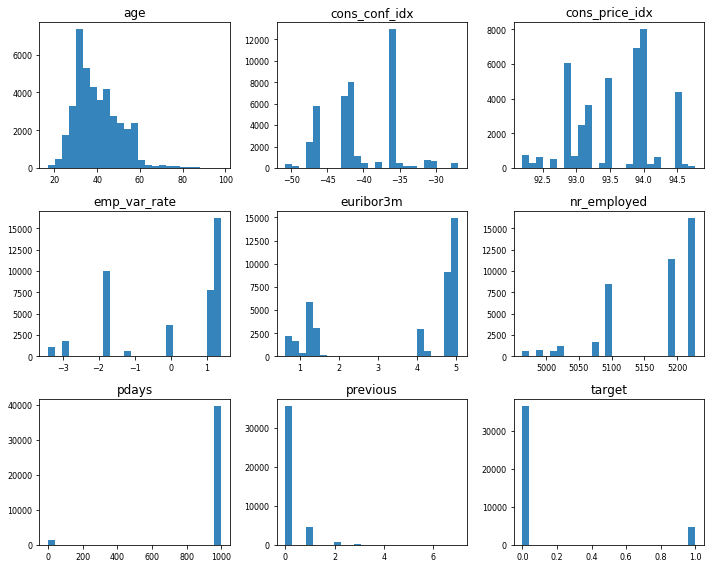

In [20]:
# Visualization of the numeric distribution
df[num_features].hist(figsize=(10,8), bins=25, xlabelsize=8, ylabelsize=8, alpha=0.9, grid=False) 
plt.tight_layout();

---

### Variable: **`age`**

In [21]:
# General stats description
stats_age = {'Designation': ['Value'],
            'Variable': 'age',
            'Description': 'clients` age',
            'Type of variable': df.age.dtype,
            'Type of distribution': 'continuous',
            'Total observations': df.age.shape[0],
            'Missing values': df.age.isnull().sum(),
            'Unique values': df.age.nunique(),
            'Min': df.age.min(),
            '25%': int(df.age.quantile(q=[.25]).iloc[-1]),
            'Median': df.age.median(),
            '75%': int(df.age.quantile(q=[.75]).iloc[-1]),
            'Max': df.age.max(),
            'Mean': df.age.mean(),
            'Std dev': df.age.std(),
            'Variance': df.age.var(),
            'Skewness': scipy.stats.skew(df.age),
            'Kurtosis': scipy.stats.kurtosis(df.age)
           }
st_age = pd.DataFrame(stats_age, columns = ['Designation', 
                                     'Variable',
                                     'Description',
                                     'Type of variable',
                                     'Type of distribution',
                                     'Total observations',
                                     'Missing values',
                                     'Unique values',
                                     'Min',
                                     '25%',
                                     'Median',
                                     '75%',
                                     'Max',
                                     'Mean',
                                     'Std dev',
                                     'Variance',
                                     'Skewness',
                                     'Kurtosis'
                                        ])
st_age.set_index("Designation", inplace=True)

results = st_age.T
resultsT = st_age
display(results)

Designation,Value
Variable,age
Description,clients` age
Type of variable,int64
Type of distribution,continuous
Total observations,41188
Missing values,0
Unique values,78
Min,17
25%,32
Median,38


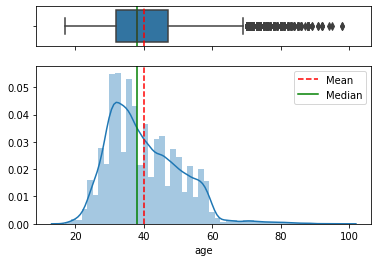

In [22]:
# Visualization of 'age'
age = df.age
np.array(age).mean()
np.median(age)

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.5, 2)})
mean=np.array(age).mean()
median=np.median(age)

sns.boxplot(age, ax=ax_box)
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')

sns.distplot(age, ax=ax_hist)
ax_hist.axvline(mean, color='r', linestyle='--')
ax_hist.axvline(median, color='g', linestyle='-')

plt.legend({'Mean':mean,'Median':median})
ax_box.set(xlabel='')
plt.show()

In [23]:
# Calculus of percentiles 1%, 5%, 95% and 99%
print("Percentiles 1%, 5%, 95%, 99%")
display(df.age.quantile(q=[.01, .05, .95, .99]))
print("")

Percentiles 1%, 5%, 95%, 99%


0.01    23.0
0.05    26.0
0.95    58.0
0.99    71.0
Name: age, dtype: float64

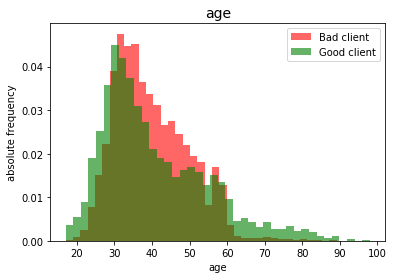

In [24]:
# Visualization variable vs. target
age_0 = df[df.target == 0].iloc[:,:1]
age_1 = df[df.target == 1].iloc[:,:1]

a = np.array(age_0)
b = np.array(age_1)

np.warnings.filterwarnings('ignore')

plt.hist(a, bins=40, density=True, color="r", alpha = 0.6, label='Bad client')
plt.hist(b, bins=40, density=True, color="g", alpha = 0.6, label='Good client')
plt.legend(loc='upper right')
plt.title('age', fontsize=14)
plt.xlabel('age')
plt.ylabel('absolute frequency')
plt.show()

We can see there are, proportionally, more subscribers between clients aged less than 30 and more than 60 years old than between the group from 30 to 60 years old.

I will be also be grouping the clients that subscribed the term deposit by age in 3 bins: young (<=30), adult (>30 to <=60) and senior (>60) using the `cut`method.

age_bins
Young     15.207373
Adult      9.430005
Senior    45.494505
Name: target, dtype: float64

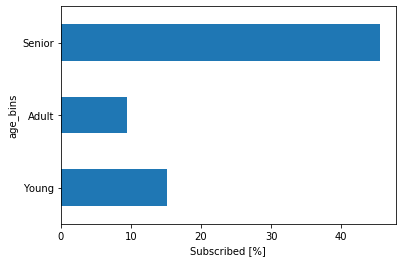

In [25]:
df['age_bins'] = pd.cut(df['age'], bins = [df['age'].min(), 30, 60, df['age'].max()], 
                  labels=['Young', 'Adult', 'Senior'])

group_age_target = df.groupby(['age_bins'])['target'].mean().multiply(100)

display(group_age_target)
print("")

# Display graph
group_age_target.plot.barh()
plt.xlabel('Subscribed [%]');

It is very clear the relation betweem the subscription rate and age of customers:
- 45.5% of Seniors (+60 years old) subscribed to the term deposit
- less than 1 in 10 Adults (>30 and <=60 years old) subscribed
- Young people were the 2nd group that subscribed the deposit corresponding to 1/6 of all young people
- Senior subscribers alone were almost as much as Young and Adults subscribers, respectively, all together

---

### Variable: **`pdays`**

In [26]:
# General stats description
stats_pdays = {'Designation': ['Value'],
            'Variable': 'age',
            'Description': 'days from last contact of previous campaign',
            'Type of variable': df.pdays.dtype,
            'Type of distribution': 'discrete',
            'Total observations': df.pdays.shape[0],
            'Missing values': df.pdays.isnull().sum(),
            'Unique values': df.pdays.nunique(),
            'Min': df.pdays.min(),
            '25%': int(df.pdays.quantile(q=[.25]).iloc[-1]),
            'Median': df.pdays.median(),
            '75%': int(df.pdays.quantile(q=[.75]).iloc[-1]),
            'Max': df.pdays.max(),
            'Mean': df.pdays.mean(),
            'Std dev': df.pdays.std(),
            'Variance': df.pdays.var(),
            'Skewness': scipy.stats.skew(df.pdays),
            'Kurtosis': scipy.stats.kurtosis(df.pdays)
           }
st_pdays = pd.DataFrame(stats_pdays, columns = ['Designation', 
                                     'Variable',
                                     'Description',
                                     'Type of variable',
                                     'Type of distribution',
                                     'Total observations',
                                     'Missing values',
                                     'Unique values',
                                     'Min',
                                     '25%',
                                     'Median',
                                     '75%',
                                     'Max',
                                     'Mean',
                                     'Std dev',
                                     'Variance',
                                     'Skewness',
                                     'Kurtosis'
                                        ])
st_pdays.set_index("Designation", inplace=True)

results = st_pdays.T
resultsT = st_pdays
display(results)

Designation,Value
Variable,age
Description,days from last contact of previous campaign
Type of variable,int64
Type of distribution,discrete
Total observations,41188
Missing values,0
Unique values,27
Min,0
25%,999
Median,999


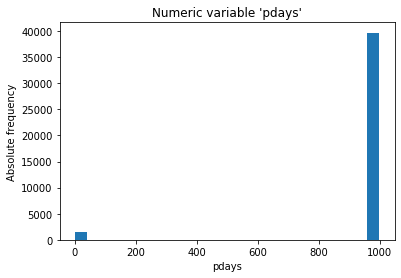

In [27]:
# Visualization of 'pdays'
plt.hist(df.pdays, bins=25)
plt.title('Numeric variable \'pdays\'', fontsize=12)
plt.xlabel('pdays')
plt.ylabel('Absolute frequency')
plt.show()

In [28]:
# Calculus percentiles 1%, 5%, 95% and 99%
print("Percentiles 1%, 5%, 95%, 99%")
display(df.pdays.quantile(q=[.01, .05, .95, .99]))
print("")

Percentiles 1%, 5%, 95%, 99%


0.01      3.0
0.05    999.0
0.95    999.0
0.99    999.0
Name: pdays, dtype: float64

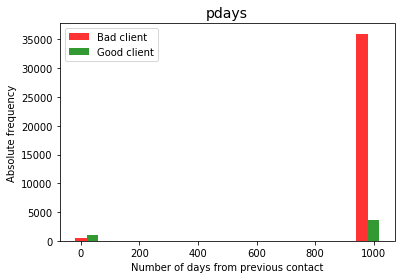

In [29]:
# Visualization variable vs. target
pdays_0 = df[df.target == 0].iloc[:,7:8]
pdays_1 = df[df.target == 1].iloc[:,7:8]

a = np.array(pdays_0)
b = np.array(pdays_1)

np.warnings.filterwarnings('ignore')

plt.hist(a, bins=25, density=False, color="r", alpha = 0.8, label='Bad client', align="left")
plt.hist(b, bins=25, density=False, color="g", alpha = 0.8, label='Good client', align="right")
plt.legend(loc='upper left')
plt.title('pdays', fontsize=14)
plt.xlabel('Number of days from previous contact')
plt.ylabel('Absolute frequency')
plt.show()

Considering only the clients who had subscribed let's count the days that passed by after contact from a previous campaign. Most of the people will respond on the 6th day and within 8 days.

Median: 6.0


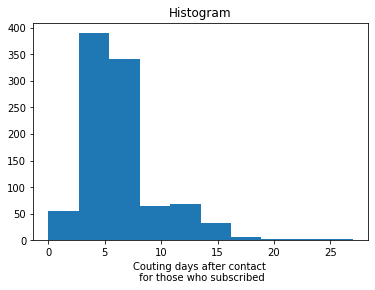

In [30]:
dummy = df.loc[(df['pdays']!=999) & (df['target'] == 1), 'pdays']
print('Median: {:.2}'.format(dummy.median()))
dummy.hist().grid(False)
plt.title('Histogram')
plt.xlabel('Couting days after contact \n for those who subscribed');

---

### Variable: **`previous`**

In [31]:
# General stats description
stats_previous = {'Designation': ['Value'],
            'Variable': 'previous',
            'Description': 'contacts before campaign for each client',
            'Type of variable': df.previous.dtype,
            'Type of distribution': 'discrete',
            'Total observations': df.previous.shape[0],
            'Missing values': df.previous.isnull().sum(),
            'Unique values': df.previous.nunique(),
            'Min': df.previous.min(),
            '25%': int(df.previous.quantile(q=[.25]).iloc[-1]),
            'Median': df.previous.median(),
            '75%': int(df.previous.quantile(q=[.75]).iloc[-1]),
            'Max': df.previous.max(),
            'Mean': df.previous.mean(),
            'Std dev': df.previous.std(),
            'Variance': df.previous.var(),
            'Skewness': scipy.stats.skew(df.previous),
            'Kurtosis': scipy.stats.kurtosis(df.previous)
           }

st_previous = pd.DataFrame(stats_previous, columns = ['Designation', 
                                     'Variable',
                                     'Description',
                                     'Type of variable',
                                     'Type of distribution',
                                     'Total observations',
                                     'Missing values',
                                     'Unique values',
                                     'Min',
                                     '25%',
                                     'Median',
                                     '75%',
                                     'Max',
                                     'Mean',
                                     'Std dev',
                                     'Variance',
                                     'Skewness',
                                     'Kurtosis'
                                        ])
st_previous.set_index("Designation", inplace=True)

results = st_previous.T
resultsT = st_previous
display(results)

Designation,Value
Variable,previous
Description,contacts before campaign for each client
Type of variable,int64
Type of distribution,discrete
Total observations,41188
Missing values,0
Unique values,8
Min,0
25%,0
Median,0


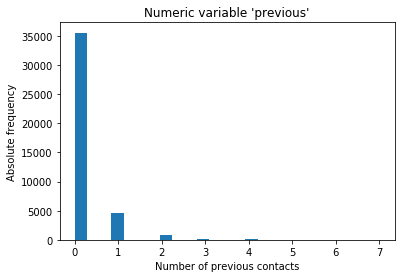

In [32]:
# Visualization of the numeric variable 'pdays'
plt.hist(df.previous, bins=25)
plt.title('Numeric variable \'previous\'', fontsize=12)
plt.xlabel('Number of previous contacts')
plt.ylabel('Absolute frequency')
plt.show()

In [33]:
# Calculus of percentiles 1%, 5%, 95% and 99%
print("Percentiles 1%, 5%, 95%, 99%")
display(df.previous.quantile(q=[.01, .05, .95, .99]))

Percentiles 1%, 5%, 95%, 99%


0.01    0.0
0.05    0.0
0.95    1.0
0.99    2.0
Name: previous, dtype: float64

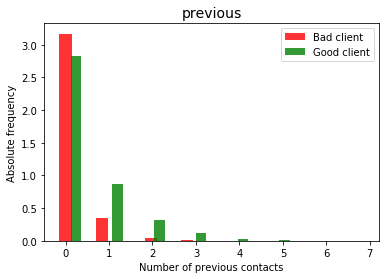

In [34]:
# Visualization variable vs. target
previous_0 = df[df.target == 0].iloc[:,8:9]
previous_1 = df[df.target == 1].iloc[:,8:9]

a = np.array(previous_0)
b = np.array(previous_1)

np.warnings.filterwarnings('ignore')

plt.hist(a, bins=25, density=True, color="r", alpha = 0.8, label='Bad client', align="left")
plt.hist(b, bins=25, density=True, color="g", alpha = 0.8, label='Good client', align="right")
plt.legend(loc='upper right')
plt.title('previous', fontsize=14)
plt.xlabel('Number of previous contacts')
plt.ylabel('Absolute frequency')
plt.show()

How many people were previously contacted? ................. 5625
How many people were contacted 7 times? .................... 1
How many people were previously contacted with sucess? ..... 4252
How many people were previously contacted with failure? .... 1373


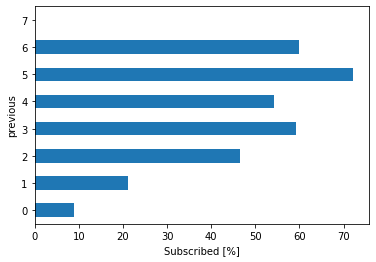

In [35]:
group = df.groupby(['previous'])['target'].mean().multiply(100)
group.plot.barh()
plt.xlabel('Subscribed [%]');

print('How many people were previously contacted? ................. {}'.format(df.loc[df['previous']!=0].shape[0]))
print('How many people were contacted 7 times? .................... {}'.format(df.loc[df['previous']==7, 'previous'].count()))
print('How many people were previously contacted with sucess? ..... {}'.format(df.poutcome.value_counts()[1]))
print('How many people were previously contacted with failure? .... {}'.format(df.poutcome.value_counts()[2]))

People that were previously contacted subscribed in a much higher rate to the term deposit.

While in people never contacted only 10% subscribed to the deposit, for people that was previously contacted more than twice the campaign success increases to >45%.

---

#### **Indexes variables**

There are 4 macro rating variables, or economic indexes, present in the dataset. Let's digg a bit further and breafly investigate their correlation and check if there are any trends of patterns between those indexes and also with each other against the target. Let's create a list only with these specific variables and display them side by side (pairplot method).

*Note: we will return to correlations subject with a deeper approach later on this project in the section Data Wrangling: Cleaning and Feature Engeneering.*

In [17]:
# creating numeric indexes

idx_list = ["cons_price_idx","cons_conf_idx","euribor3m","emp_var_rate","target"]

df[idx_list].corr()

,cons_price_idx,cons_conf_idx,euribor3m,emp_var_rate,target
cons_price_idx,1.000000,0.058986,0.688230,0.775334,-0.136211
cons_conf_idx,0.058986,1.000000,0.277686,0.196041,0.054878
euribor3m,0.688230,0.277686,1.000000,0.972245,-0.307771
emp_var_rate,0.775334,0.196041,0.972245,1.000000,-0.298334
target,-0.136211,0.054878,-0.307771,-0.298334,1.000000


We can clearly see that `euribor3m`,`cons_price_idx` and `emp_Var_rate` are highly correlated.

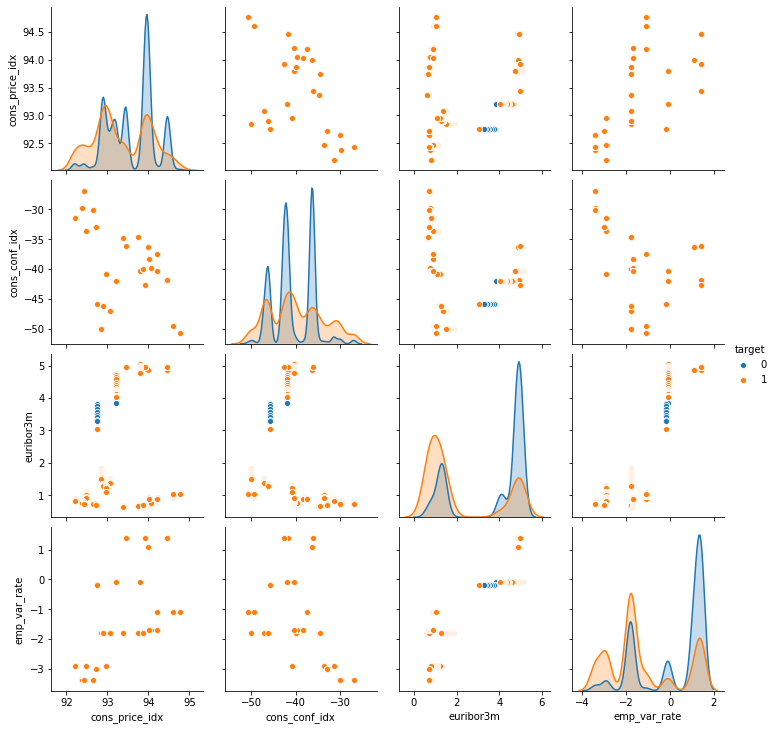

In [18]:
# Visualization of indexes variables' correlations (pairplot)
sns.pairplot(df[idx_list], hue="target")
plt.show()

What can we observe from the **scatter plots**? *Please keep in mind that (blue) 0=NO and (orange) 1=YES*
- `euribor3m` increases when there is a positive variation of `emp_var_rate`
- `cons_conf_idx`varys linearly with `cons_price_idx` and `emp_var_rate`: the higher the prices and rate of employment gets, the lower the confidance level index becomes;
- when `emp_var_rate` (employment rate) increases, `cons_price_idx` (price index) increases as well

Can the output of the campaign be affected by the indexes variables? The answer comes from the observation of the **distribution plots**.
- the lower the `euribor3m`is, the higher the amount of subscriptions
- when the `cons_price_idx`(consumer price index) increases there is a strong negative response from the clients' subscriptions
- when the `emp_var_rate` (employment rate) is negative, there is a higher positive response to the campaign. Feature importance will be study later and we'll have the opportunity to clarify these apparent inconsistences

### Variable: **emp_var_rate**

In [36]:
# General stats description
stats_emp_var_rate = {'Designation': ['Value'],
            'Variable': 'emp_var_rate',
            'Description': 'employment variation rate',
            'Type of variable': df.emp_var_rate.dtype,
            'Type of distribution': 'discrete',
            'Total observations': df.emp_var_rate.shape[0],
            'Missing values': df.emp_var_rate.isnull().sum(),
            'Unique values': df.emp_var_rate.nunique(),
            'Min': df.emp_var_rate.min(),
            '25%': int(df.emp_var_rate.quantile(q=[.25]).iloc[-1]),
            'Median': df.emp_var_rate.median(),
            '75%': int(df.emp_var_rate.quantile(q=[.75]).iloc[-1]),
            'Max': df.emp_var_rate.max(),
            'Mean': df.emp_var_rate.mean(),
            'Std dev': df.emp_var_rate.std(),
            'Variance': df.emp_var_rate.var(),
            'Skewness': scipy.stats.skew(df.emp_var_rate),
            'Kurtosis': scipy.stats.kurtosis(df.emp_var_rate)
           }

st_emp_var_rate = pd.DataFrame(stats_emp_var_rate, columns = ['Designation', 
                                     'Variable',
                                     'Description',
                                     'Type of variable',
                                     'Type of distribution',
                                     'Total observations',
                                     'Missing values',
                                     'Unique values',
                                     'Min',
                                     '25%',
                                     'Median',
                                     '75%',
                                     'Max',
                                     'Mean',
                                     'Std dev',
                                     'Variance',
                                     'Skewness',
                                     'Kurtosis'
                                        ])
st_emp_var_rate.set_index("Designation", inplace=True)

results = st_emp_var_rate.T
resultsT = st_emp_var_rate
display(results)

Designation,Value
Variable,emp_var_rate
Description,employment variation rate
Type of variable,float64
Type of distribution,discrete
Total observations,41188
Missing values,0
Unique values,10
Min,-3.4
25%,-1
Median,1.1


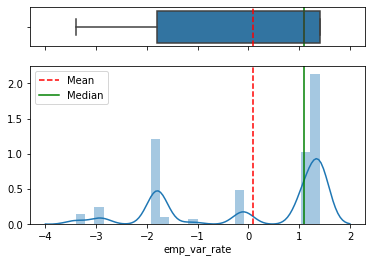

In [37]:
# Visualization of the numeric 'emp_var_rate'
emp_var_rate = df.emp_var_rate
np.array(emp_var_rate).mean()
np.median(emp_var_rate)

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.5, 2)})
mean=np.array(emp_var_rate).mean()
median=np.median(emp_var_rate)

sns.boxplot(emp_var_rate, ax=ax_box)
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')

sns.distplot(emp_var_rate, ax=ax_hist)
ax_hist.axvline(mean, color='r', linestyle='--')
ax_hist.axvline(median, color='g', linestyle='-')

plt.legend({'Mean':mean,'Median':median})
ax_box.set(xlabel='');

In [38]:
# Calculus of percentiles 1%, 5%, 95% and 99%
print("Percentiles 1%, 5%, 95%, 99%")
display(df.emp_var_rate.quantile(q=[.01, .05, .95, .99]))

Percentiles 1%, 5%, 95%, 99%


0.01   -3.4
0.05   -2.9
0.95    1.4
0.99    1.4
Name: emp_var_rate, dtype: float64

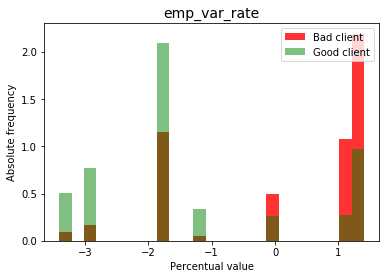

In [39]:
# Visualization of variable vs. target
emp_var_rate_0 = df[df.target == 0].iloc[:,10:11]
emp_var_rate_1 = df[df.target == 1].iloc[:,10:11]

a = np.array(emp_var_rate_0)
b = np.array(emp_var_rate_1)

np.warnings.filterwarnings('ignore')

plt.hist(a, bins=25, density=True, color="r", alpha = 0.8, label='Bad client')
plt.hist(b, bins=25, density=True, color="g", alpha = 0.5, label='Good client')
plt.legend(loc='upper right')
plt.title('emp_var_rate', fontsize=14)
plt.xlabel('Percentual value')
plt.ylabel('Absolute frequency');

### Variable: **cons_price_idx**

In [40]:
# General stats description
stats_cons_price_idx = {'Designation': ['Value'],
            'Variable': 'cons_price_idx',
            'Description': 'consumer price index',
            'Type of variable': df.cons_price_idx.dtype,
            'Type of distribution': 'discrete',
            'Total observations': df.cons_price_idx.shape[0],
            'Missing values': df.cons_price_idx.isnull().sum(),
            'Unique values': df.cons_price_idx.nunique(),
            'Min': df.cons_price_idx.min(),
            '25%': int(df.cons_price_idx.quantile(q=[.25]).iloc[-1]),
            'Median': df.cons_price_idx.median(),
            '75%': int(df.cons_price_idx.quantile(q=[.75]).iloc[-1]),
            'Max': df.cons_price_idx.max(),
            'Mean': df.cons_price_idx.mean(),
            'Std dev': df.cons_price_idx.std(),
            'Variance': df.cons_price_idx.var(),
            'Skewness': scipy.stats.skew(df.cons_price_idx),
            'Kurtosis': scipy.stats.kurtosis(df.cons_price_idx)
           }

st_cons_price_idx = pd.DataFrame(stats_cons_price_idx, columns = ['Designation', 
                                     'Variable',
                                     'Description',
                                     'Type of variable',
                                     'Type of distribution',
                                     'Total observations',
                                     'Missing values',
                                     'Unique values',
                                     'Min',
                                     '25%',
                                     'Median',
                                     '75%',
                                     'Max',
                                     'Mean',
                                     'Std dev',
                                     'Variance',
                                     'Skewness',
                                     'Kurtosis'
                                        ])
st_cons_price_idx.set_index("Designation", inplace=True)

results = st_cons_price_idx.T
resultsT = st_cons_price_idx
display(results)

Designation,Value
Variable,cons_price_idx
Description,consumer price index
Type of variable,float64
Type of distribution,discrete
Total observations,41188
Missing values,0
Unique values,26
Min,92.201
25%,93
Median,93.749


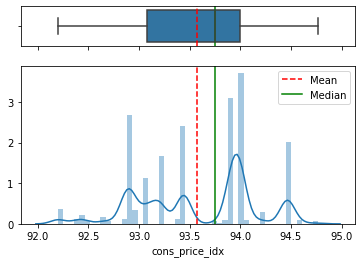

In [41]:
# Visualization of numeric 'cons_price_idx'
cons_price_idx = df.cons_price_idx
np.array(cons_price_idx).mean()
np.median(cons_price_idx)

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.5, 2)})
mean=np.array(cons_price_idx).mean()
median=np.median(cons_price_idx)

sns.boxplot(cons_price_idx, ax=ax_box)
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')

sns.distplot(cons_price_idx, ax=ax_hist)
ax_hist.axvline(mean, color='r', linestyle='--')
ax_hist.axvline(median, color='g', linestyle='-')

plt.legend({'Mean':mean,'Median':median})
ax_box.set(xlabel='');

In [42]:
# Calculus of percentiles 1%, 5%, 95% and 99%
print("Percentiles 1%, 5%, 95%, 99%")
display(df.cons_price_idx.quantile(q=[.01, .05, .95, .99]))

Percentiles 1%, 5%, 95%, 99%


0.01    92.201
0.05    92.713
0.95    94.465
0.99    94.465
Name: cons_price_idx, dtype: float64

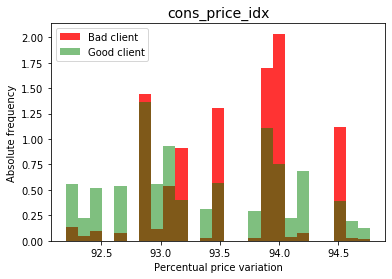

In [43]:
# Visualization of variable vs. target
cons_price_idx_0 = df[df.target == 0].iloc[:,11:12]
cons_price_idx_1 = df[df.target == 1].iloc[:,11:12]

a = np.array(cons_price_idx_0)
b = np.array(cons_price_idx_1)

np.warnings.filterwarnings('ignore')

plt.hist(a, bins=25, density=True, color="r", alpha = 0.8, label='Bad client')
plt.hist(b, bins=25, density=True, color="g", alpha = 0.5, label='Good client')
plt.legend(loc='upper left')
plt.title('cons_price_idx', fontsize=14)
plt.xlabel('Percentual price variation')
plt.ylabel('Absolute frequency');

### Variable: **cons_conf_idx**

In [44]:
# General stats description
stats_cons_conf_idx = {'Designation': ['Value'],
            'Variable': 'cons_conf_idx',
            'Description': 'consumer confidence index',
            'Type of variable': df.cons_conf_idx.dtype,
            'Type of distribution': 'discrete',
            'Total observations': df.cons_conf_idx.shape[0],
            'Missing values': df.cons_conf_idx.isnull().sum(),
            'Unique values': df.cons_conf_idx.nunique(),
            'Min': df.cons_conf_idx.min(),
            '25%': int(df.cons_conf_idx.quantile(q=[.25]).iloc[-1]),
            'Median': df.cons_conf_idx.median(),
            '75%': int(df.cons_conf_idx.quantile(q=[.75]).iloc[-1]),
            'Max': df.cons_conf_idx.max(),
            'Mean': df.cons_conf_idx.mean(),
            'Std dev': df.cons_conf_idx.std(),
            'Variance': df.cons_conf_idx.var(),
            'Skewness': scipy.stats.skew(df.cons_conf_idx),
            'Kurtosis': scipy.stats.kurtosis(df.cons_conf_idx)
           }

st_cons_conf_idx = pd.DataFrame(stats_cons_conf_idx, columns = ['Designation', 
                                     'Variable',
                                     'Description',
                                     'Type of variable',
                                     'Type of distribution',
                                     'Total observations',
                                     'Missing values',
                                     'Unique values',
                                     'Min',
                                     '25%',
                                     'Median',
                                     '75%',
                                     'Max',
                                     'Mean',
                                     'Std dev',
                                     'Variance',
                                     'Skewness',
                                     'Kurtosis'
                                        ])
st_cons_conf_idx.set_index("Designation", inplace=True)

results = st_cons_conf_idx.T
resultsT = st_cons_conf_idx
display(results)

Designation,Value
Variable,cons_conf_idx
Description,consumer confidence index
Type of variable,float64
Type of distribution,discrete
Total observations,41188
Missing values,0
Unique values,26
Min,-50.8
25%,-42
Median,-41.8


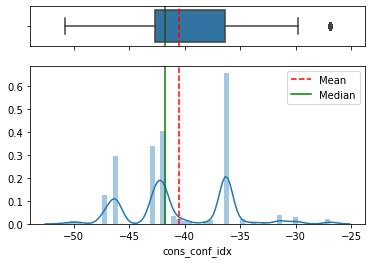

In [45]:
# Visualization of numeric 'cons_conf_idx'
cons_conf_idx = df.cons_conf_idx
np.array(cons_conf_idx).mean()
np.median(cons_conf_idx)

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.5, 2)})
mean=np.array(cons_conf_idx).mean()
median=np.median(cons_conf_idx)

sns.boxplot(cons_conf_idx, ax=ax_box)
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')

sns.distplot(cons_conf_idx, ax=ax_hist)
ax_hist.axvline(mean, color='r', linestyle='--')
ax_hist.axvline(median, color='g', linestyle='-')

plt.legend({'Mean':mean,'Median':median})
ax_box.set(xlabel='');

In [46]:
# Calculus of percentiles 1%, 5%, 95% and 99%
print("Percentiles 1%, 5%, 95%, 99%")
display(df.cons_conf_idx.quantile(q=[.01, .05, .95, .99]))

Percentiles 1%, 5%, 95%, 99%


0.01   -49.5
0.05   -47.1
0.95   -33.6
0.99   -26.9
Name: cons_conf_idx, dtype: float64

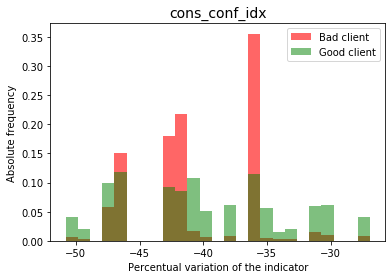

In [47]:
# Visualization of variable vs. target
cons_conf_idx_0 = df[df.target == 0].iloc[:,12:13]
cons_conf_idx_1 = df[df.target == 1].iloc[:,12:13]

a = np.array(cons_conf_idx_0)
b = np.array(cons_conf_idx_1)

np.warnings.filterwarnings('ignore')

plt.hist(a, bins=25, density=True, color="r", alpha = 0.6, label='Bad client')
plt.hist(b, bins=25, density=True, color="g", alpha = 0.5, label='Good client')
plt.legend(loc='upper right')
plt.title('cons_conf_idx', fontsize=14)
plt.xlabel('Percentual variation of the indicator')
plt.ylabel('Absolute frequency');

### Variable: **euribor3m**

In [48]:
# General stats description
stats_euribor3m = {'Designation': ['Value'],
            'Variable': 'euribor3m',
            'Description': 'euribor 3 month rate',
            'Type of variable': df.euribor3m.dtype,
            'Type of distribution': 'discrete',
            'Total observations': df.euribor3m.shape[0],
            'Missing values': df.euribor3m.isnull().sum(),
            'Unique values': df.euribor3m.nunique(),
            'Min': df.euribor3m.min(),
            '25%': int(df.euribor3m.quantile(q=[.25]).iloc[-1]),
            'Median': df.euribor3m.median(),
            '75%': int(df.euribor3m.quantile(q=[.75]).iloc[-1]),
            'Max': df.euribor3m.max(),
            'Mean': df.euribor3m.mean(),
            'Std dev': df.euribor3m.std(),
            'Variance': df.euribor3m.var(),
            'Skewness': scipy.stats.skew(df.euribor3m),
            'Kurtosis': scipy.stats.kurtosis(df.euribor3m)
           }

st_euribor3m = pd.DataFrame(stats_euribor3m, columns = ['Designation', 
                                     'Variable',
                                     'Description',
                                     'Type of variable',
                                     'Type of distribution',
                                     'Total observations',
                                     'Missing values',
                                     'Unique values',
                                     'Min',
                                     '25%',
                                     'Median',
                                     '75%',
                                     'Max',
                                     'Mean',
                                     'Std dev',
                                     'Variance',
                                     'Skewness',
                                     'Kurtosis'
                                        ])
st_euribor3m.set_index("Designation", inplace=True)

results = st_euribor3m.T
resultsT = st_euribor3m
display(results)

Designation,Value
Variable,euribor3m
Description,euribor 3 month rate
Type of variable,float64
Type of distribution,discrete
Total observations,41188
Missing values,0
Unique values,316
Min,0.634
25%,1
Median,4.857


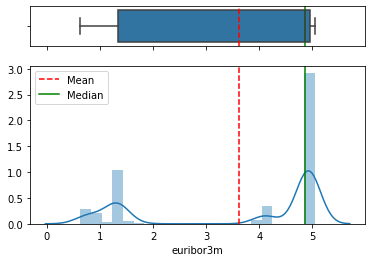

In [49]:
# Visualization of numeric 'euribor3m'
euribor3m = df.euribor3m
np.array(euribor3m).mean()
np.median(euribor3m)

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.5, 2)})
mean=np.array(euribor3m).mean()
median=np.median(euribor3m)

sns.boxplot(euribor3m, ax=ax_box)
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')

sns.distplot(euribor3m, ax=ax_hist)
ax_hist.axvline(mean, color='r', linestyle='--')
ax_hist.axvline(median, color='g', linestyle='-')

plt.legend({'Mean':mean,'Median':median})
ax_box.set(xlabel='');

In [50]:
# Calculus of percentiles 1%, 5%, 95% and 99%
print("Percentiles 1%, 5%, 95%, 99%")
display(df.euribor3m.quantile(q=[.01, .05, .95, .99]))

Percentiles 1%, 5%, 95%, 99%


0.01    0.65848
0.05    0.79700
0.95    4.96600
0.99    4.96800
Name: euribor3m, dtype: float64

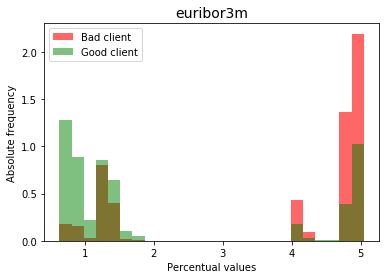

In [51]:
# Visualization of variable vs. target
euribor3m_0 = df[df.target == 0].iloc[:,13:14]
euribor3m_1 = df[df.target == 1].iloc[:,13:14]

a = np.array(euribor3m_0)
b = np.array(euribor3m_1)

np.warnings.filterwarnings('ignore')

plt.hist(a, bins=25, density=True, color="r", alpha = 0.6, label='Bad client')
plt.hist(b, bins=25, density=True, color="g", alpha = 0.5, label='Good client')
plt.legend(loc='upper left')
plt.title('euribor3m', fontsize=14)
plt.xlabel('Percentual values')
plt.ylabel('Absolute frequency');

---

### Variable: **nr_employed**

In [52]:
# General stats description
stats_nr_employed = {'Designation': ['Value'],
            'Variable': 'nr_employed',
            'Description': 'number of employed citizens',
            'Type of variable': df.nr_employed.dtype,
            'Type of distribution': 'discrete',
            'Total observations': df.nr_employed.shape[0],
            'Missing values': df.nr_employed.isnull().sum(),
            'Unique values': df.nr_employed.nunique(),
            'Min': df.nr_employed.min(),
            '25%': int(df.nr_employed.quantile(q=[.25]).iloc[-1]),
            'Median': df.nr_employed.median(),
            '75%': int(df.nr_employed.quantile(q=[.75]).iloc[-1]),
            'Max': df.nr_employed.max(),
            'Mean': df.nr_employed.mean(),
            'Std dev': df.nr_employed.std(),
            'Variance': df.nr_employed.var(),
            'Skewness': scipy.stats.skew(df.nr_employed),
            'Kurtosis': scipy.stats.kurtosis(df.nr_employed)
           }

st_nr_employed = pd.DataFrame(stats_nr_employed, columns = ['Designation', 
                                     'Variable',
                                     'Description',
                                     'Type of variable',
                                     'Type of distribution',
                                     'Total observations',
                                     'Missing values',
                                     'Unique values',
                                     'Min',
                                     '25%',
                                     'Median',
                                     '75%',
                                     'Max',
                                     'Mean',
                                     'Std dev',
                                     'Variance',
                                     'Skewness',
                                     'Kurtosis'
                                        ])
st_nr_employed.set_index("Designation", inplace=True)

results = st_nr_employed.T
resultsT = st_nr_employed
display(results)

Designation,Value
Variable,nr_employed
Description,number of employed citizens
Type of variable,float64
Type of distribution,discrete
Total observations,41188
Missing values,0
Unique values,11
Min,4963.6
25%,5099
Median,5191


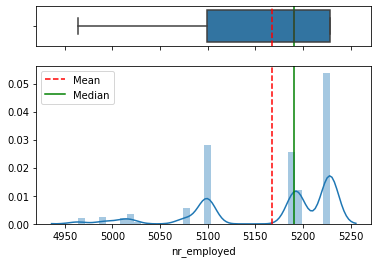

In [53]:
# Visualização da variável numérica 'nr_employed'
nr_employed = df.nr_employed
np.array(nr_employed).mean()
np.median(nr_employed)

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.5, 2)})
mean=np.array(nr_employed).mean()
median=np.median(nr_employed)

sns.boxplot(nr_employed, ax=ax_box)
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')

sns.distplot(nr_employed, ax=ax_hist)
ax_hist.axvline(mean, color='r', linestyle='--')
ax_hist.axvline(median, color='g', linestyle='-')

plt.legend({'Mean':mean,'Median':median})
ax_box.set(xlabel='');

In [54]:
# Calculus of percentiles 1%, 5%, 95% and 99%
print("Percentiles 1%, 5%, 95%, 99%")
display(df.nr_employed.quantile(q=[.01, .05, .95, .99]))

Percentiles 1%, 5%, 95%, 99%


0.01    4963.6
0.05    5017.5
0.95    5228.1
0.99    5228.1
Name: nr_employed, dtype: float64

From the previous analysis, it is already known that people that were previouly contacted had higher rates of subscription. The above histogram shows the first contacts were exclusively made to previous and therefore known clients resulting in a much more efficient campaign with a low number of employed people.
In the second and third stages we can see an increasingly higher number of employed and also higher number of contacts made. This however did not increased the amount of subscriptions specially in the third stage.

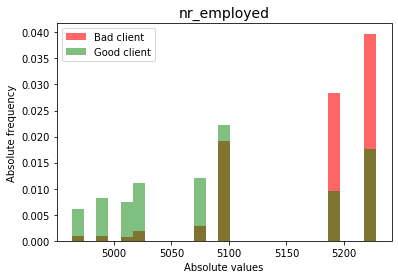

In [55]:
# Visualization of variable vs. target
nr_employed_0 = df[df.target == 0].iloc[:,14:15]
nr_employed_1 = df[df.target == 1].iloc[:,14:15]

a = np.array(nr_employed_0)
b = np.array(nr_employed_1)

np.warnings.filterwarnings('ignore')

plt.hist(a, bins=25, density=True, color="r", alpha = 0.6, label='Bad client')
plt.hist(b, bins=25, density=True, color="g", alpha = 0.5, label='Good client')
plt.legend(loc='upper left')
plt.title('nr_employed', fontsize=14)
plt.xlabel('Absolute values')
plt.ylabel('Absolute frequency');

---
---

## **Categorical variables** (df_cat)

### Variable: **job**

The categoric variable 'job' has 12 unique values. There is a class labeled as 'unknown' that should be considered a missing value (I'll not do anything about missing values or other anomalies for now, I'll save it for the next section, Data Wrangling: Cleaning and Feature Engeneering).

In [56]:
# General stats description
stats_job = {'Designation': ['Value'],
            'Variable': 'job',
            'Description': 'type of job',
            'Type of variable': df.job.dtype,
            'Total observations': df.job.shape[0],
            'Unique values': df.job.nunique(),
           }

st_job = pd.DataFrame(stats_job, columns = ['Designation', 
                                     'Variable',
                                     'Description',
                                     'Type of variable',
                                     'Total observations',
                                     'Unique values',
                                        ])
st_job.set_index("Designation", inplace=True)

results = st_job.T
resultsT = st_job
display(results)
print(f"List of unique values: {df.job.unique()}")

Designation,Value
Variable,job
Description,type of job
Type of variable,object
Total observations,41188
Unique values,12


List of unique values: ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']


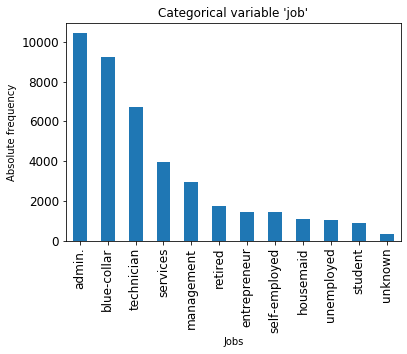

In [57]:
# Visualization of the categoric 'job'
data_count = df['job'].value_counts().plot(kind='bar', figsize=(6,4), fontsize=12)
plt.title('Categorical variable \'job\'', fontsize=12)
plt.xlabel('Jobs')
plt.ylabel('Absolute frequency');

In [58]:
# Number of observations by class
num_obs = df.job.value_counts()
num_o = pd.DataFrame(num_obs)
num_o.rename(columns={"job":"Freq abs"}, inplace=True)
num_o_pc = (df.job.value_counts(normalize=True) * 100).round(decimals=2)
num_obs_pc = pd.DataFrame(num_o_pc)
num_obs_pc.rename(columns={"job":"percent %"}, inplace=True)
n_obs = pd.concat([num_o,num_obs_pc], axis=1)
display(n_obs)

,Freq abs,percent %
admin.,10422,25.30
blue-collar,9254,22.47
technician,6743,16.37
services,3969,9.64
management,2924,7.10
retired,1720,4.18
entrepreneur,1456,3.54
self-employed,1421,3.45
housemaid,1060,2.57
unemployed,1014,2.46


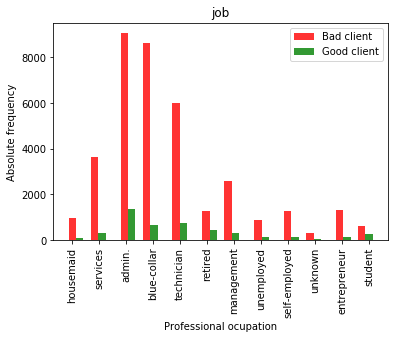

In [59]:
# Graph 'job' vs. 'target'
job_0 = df[df.target == 0].iloc[:,1:2]
job_1 = df[df.target == 1].iloc[:,1:2]

a = np.array(job_0)
b = np.array(job_1)

np.warnings.filterwarnings('ignore')

plt.hist(a, bins=40, color="r", alpha = 0.8, label='Bad client', align="left")
plt.hist(b, bins=40, color="g", alpha = 0.8, label='Good client', align="right")
plt.legend(loc='upper right')
plt.title('job', fontsize=12)
plt.xlabel('Professional ocupation')
plt.xticks(rotation='vertical')
plt.ylabel('Absolute frequency');

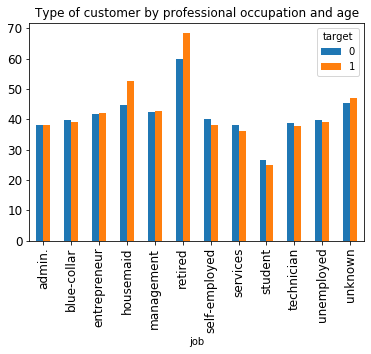

In [60]:
# Graph: type of customer by professional occupation and age
#Pivot_table
type_pivot = df.pivot_table(
    columns="target",
    index="job",
    values="age", aggfunc=np.mean)

# Display pivot_table
type_pivot.sort_values(by=["job"], 
                       ascending=True).plot(kind="bar", 
                                             title=("Type of customer by professional occupation and age"), 
                                             figsize=(6,4),
                                             fontsize = 12);

---

### Variable: **marital**

The variable 'marital' has 4 unique values including the 'unknown' class that should be interpreted as a missing value. Bellow, the chart and table shows us the dominant class is the 'married' people with 61% and the 'divorced' clients correspond to 11% of all clients.

In [61]:
# General stats description
stats_marital = {'Designation': ['Value'],
            'Variable': 'marital',
            'Description': 'marital situation',
            'Type of variable': df.marital.dtype,
            'Total observations': df.marital.shape[0],
            'Unique values': df.marital.nunique(),
           }

st_marital = pd.DataFrame(stats_marital, columns = ['Designation', 
                                     'Variable',
                                     'Description',
                                     'Type of variable',
                                     'Total observations',
                                     'Unique values',
                                        ])
st_marital.set_index("Designation", inplace=True)

results = st_marital.T
resultsT = st_marital
display(results)
print(f"List of unique values: {df.marital.unique()}")

Designation,Value
Variable,marital
Description,marital situation
Type of variable,object
Total observations,41188
Unique values,4


List of unique values: ['married' 'single' 'divorced' 'unknown']


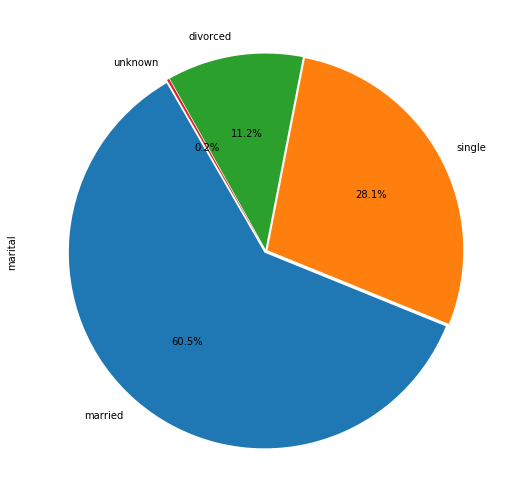

In [62]:
# Graph "pie"
df['marital'].value_counts(dropna=False).plot(kind='pie', figsize=(14,9),
                                              explode = (0.01, 0.01, 0.01, 0.01),
                                              autopct='%1.1f%%',
                                              startangle=120);

In [63]:
# Number of observations by class
marital_obs = df.marital.value_counts()
marital_o = pd.DataFrame(marital_obs)
marital_o.rename(columns={"marital":"Freq abs"}, inplace=True)
marital_o_pc = (df.marital.value_counts(normalize=True) * 100).round(decimals=2)
marital_obs_pc = pd.DataFrame(marital_o_pc)
marital_obs_pc.rename(columns={"marital":"percent %"}, inplace=True)
marital_obs = pd.concat([marital_o,marital_obs_pc], axis=1)
display(marital_obs)

,Freq abs,percent %
married,24928,60.52
single,11568,28.09
divorced,4612,11.20
unknown,80,0.19


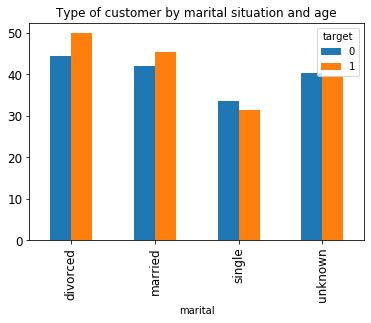

In [64]:
# Graph: Type of customer by marital situation and age
# Pivot_table
type_pivot = df.pivot_table(
    columns="target",
    index="marital",
    values="age", aggfunc=np.mean)

# Display pivot_table
type_pivot.sort_values(by=["marital"], 
                       ascending=True).plot(kind="bar", 
                                             title=("Type of customer by marital situation and age"), 
                                             figsize=(6,4),
                                             fontsize = 12);

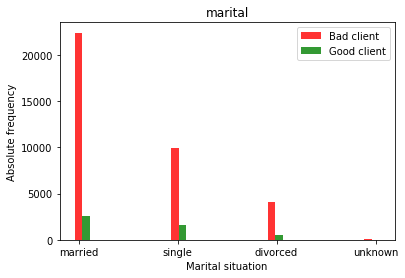

In [65]:
# Graph 'marital' vs. 'target'
marital_0 = df[df.target == 0].iloc[:,2:3]
marital_1 = df[df.target == 1].iloc[:,2:3]

a = np.array(marital_0)
b = np.array(marital_1)

np.warnings.filterwarnings('ignore')

plt.hist(a, bins=40, color="r", alpha = 0.8, label='Bad client', align="left")
plt.hist(b, bins=40, color="g", alpha = 0.8, label='Good client', align="right")
plt.legend(loc='upper right')
plt.title('marital', fontsize=12)
plt.xlabel('Marital situation')
plt.xticks(rotation='horizontal')
plt.ylabel('Absolute frequency')
plt.show()

---

### Variable: **education**

The variable 'education' has 8 unique values with the 'unknown' class interpreted as missing values. The first half (the top 4) education levels correspond to 80% of the variable's data. Clients with 4 years basic or iliterate are the oldest but are at the same time more prone to subscribe the product.

In [66]:
# General stats description
stats_education = {'Designation': ['Value'],
            'Variable': 'education',
            'Description': 'education level',
            'Type of variable': df.education.dtype,
            'Total observations': df.education.shape[0],
            'Unique values': df.education.nunique(),
           }

st_education = pd.DataFrame(stats_education, columns = ['Designation', 
                                     'Variable',
                                     'Description',
                                     'Type of variable',
                                     'Total observations',
                                     'Unique values',
                                        ])
st_education.set_index("Designation", inplace=True)

results = st_education.T
resultsT = st_education
display(results)
print(f"List of unique values: {df.education.unique()}")

Designation,Value
Variable,education
Description,education level
Type of variable,object
Total observations,41188
Unique values,8


List of unique values: ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']


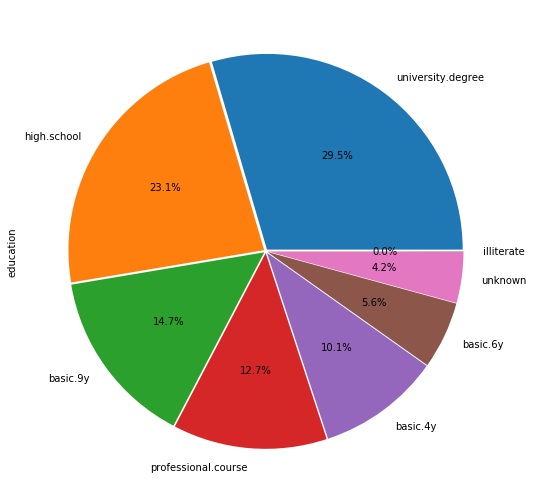

In [67]:
# Graph "pie"
df['education'].value_counts(dropna=False).plot(kind='pie', 
                                                figsize=(13,9), 
                                                explode = (0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01),
                                                autopct='%1.1f%%',
                                                startangle=0);

In [68]:
# Number of observations by class
edu_obs = df.education.value_counts()
edu_o = pd.DataFrame(edu_obs)
edu_o.rename(columns={"education":"Freq abs"}, inplace=True)
edu_o_pc = (df.education.value_counts(normalize=True) * 100).round(decimals=2)
edu_obs_pc = pd.DataFrame(edu_o_pc)
edu_obs_pc.rename(columns={"education":"percent %"}, inplace=True)
edu_obs = pd.concat([edu_o,edu_obs_pc], axis=1)
edu_obs

,Freq abs,percent %
university.degree,12168,29.54
high.school,9515,23.10
basic.9y,6045,14.68
professional.course,5243,12.73
basic.4y,4176,10.14
basic.6y,2292,5.56
unknown,1731,4.20
illiterate,18,0.04


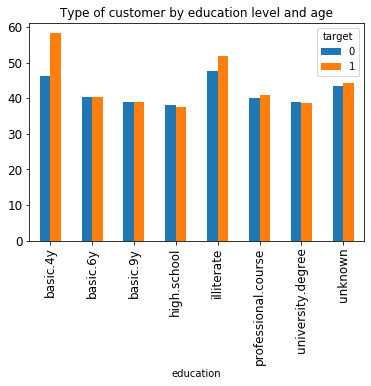

In [69]:
# Graph: Type of customer by education level and age
# Pivot_table
type_pivot = df.pivot_table(
    columns="target",
    index="education",
    values="age", aggfunc=np.mean)

# Display pivot_table
type_pivot.sort_values(by=["education"], 
                       ascending=True).plot(kind="bar",
                                             title=("Type of customer by education level and age"), 
                                             figsize=(6,4),
                                             fontsize = 12);

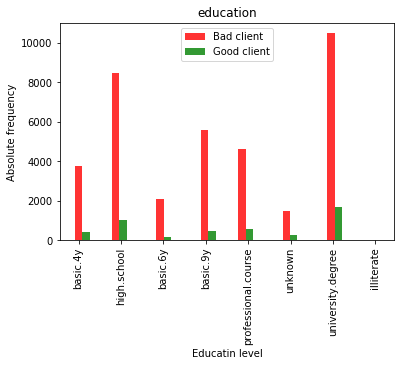

In [70]:
# Graph 'education' vs. 'target'
education_0 = df[df.target == 0].iloc[:,3:4]
education_1 = df[df.target == 1].iloc[:,3:4]

a = np.array(education_0)
b = np.array(education_1)

np.warnings.filterwarnings('ignore')

plt.hist(a, bins=40, color="r", alpha = 0.8, label='Bad client', align="left")
plt.hist(b, bins=40, color="g", alpha = 0.8, label='Good client', align="right")
plt.legend(loc='upper center')
plt.title('education', fontsize=12)
plt.xlabel('Educatin level')
plt.xticks(rotation='vertical')
plt.ylabel('Absolute frequency')
plt.show()

---

### Variable: **default**

This variable has 3 unique values and if we look a bit closer we find that the 'yes' class is meaningless. If there are only 3 'yes' records, the 'unkown' is considered to be a missing value meaning the variable is unexpressive and totaly embalanced.

In [71]:
# General stats description
stats_default = {'Designation': ['Value'],
            'Variable': 'default',
            'Description': 'has credit in default?',
            'Type of variable': df.default.dtype,
            'Total observations': df.default.shape[0],
            'Unique values': df.default.nunique(),
           }

st_default = pd.DataFrame(stats_default, columns = ['Designation', 
                                     'Variable',
                                     'Description',
                                     'Type of variable',
                                     'Total observations',
                                     'Unique values',
                                        ])
st_default.set_index("Designation", inplace=True)

results = st_default.T
resultsT = st_default
display(results)
print(f"List of unique values: {df.default.unique()}")

Designation,Value
Variable,default
Description,has credit in default?
Type of variable,object
Total observations,41188
Unique values,3


List of unique values: ['no' 'unknown' 'yes']


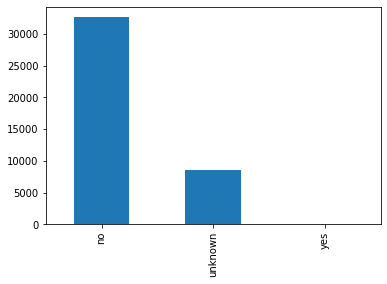

In [72]:
# Graph "bar"
df['default'].value_counts(dropna=False).plot(kind='bar', figsize=(6,4));

In [73]:
# Number of observations by class
default_obs = df.default.value_counts()
default_o = pd.DataFrame(default_obs)
default_o.rename(columns={"default":"Freq abs"}, inplace=True)
default_o_pc = (df.default.value_counts(normalize=True) * 100).round(decimals=2)
default_obs_pc = pd.DataFrame(default_o_pc)
default_obs_pc.rename(columns={"default":"percent %"}, inplace=True)
default_obs = pd.concat([default_o,default_obs_pc], axis=1)
default_obs

,Freq abs,percent %
no,32588,79.12
unknown,8597,20.87
yes,3,0.01


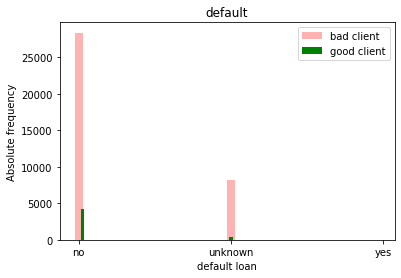

In [74]:
# Graph 'default' vs. 'target'
default_0 = df[df.target == 0].iloc[:,4:5]
default_1 = df[df.target == 1].iloc[:,4:5]

a = np.array(default_0)
b = np.array(default_1)

np.warnings.filterwarnings('ignore')

plt.hist(a, bins=40, color="r", alpha = 0.3, label='bad client', align="left")
plt.hist(b, bins=40, color="g", alpha = 1, label='good client', align="right")
plt.legend(loc='upper right')
plt.title('default', fontsize=12)
plt.xlabel('default loan')
plt.xticks(rotation='horizontal')
plt.ylabel('Absolute frequency');

---

### Variable: **housing**

This variable has 3 unique values with the 'unknown', interpreted as a missing value, representing 2% of observations. The proportion of 'yes' and 'no' is very even and it might not be a positive thing since it might reduce its predictive power.

In [75]:
# General stats description
stats_housing = {'Designation': ['Value'],
            'Variable': 'housing',
            'Description': 'has housing loan?',
            'Type of variable': df.housing.dtype,
            'Total observations': df.housing.shape[0],
            'Unique values': df.housing.nunique(),
           }

st_housing = pd.DataFrame(stats_housing, columns = ['Designation', 
                                     'Variable',
                                     'Description',
                                     'Type of variable',
                                     'Total observations',
                                     'Unique values',
                                        ])
st_housing.set_index("Designation", inplace=True)

results = st_housing.T
resultsT = st_housing
display(results)
print(f"List of unique values: {df.housing.unique()}")

Designation,Value
Variable,housing
Description,has housing loan?
Type of variable,object
Total observations,41188
Unique values,3


List of unique values: ['no' 'yes' 'unknown']


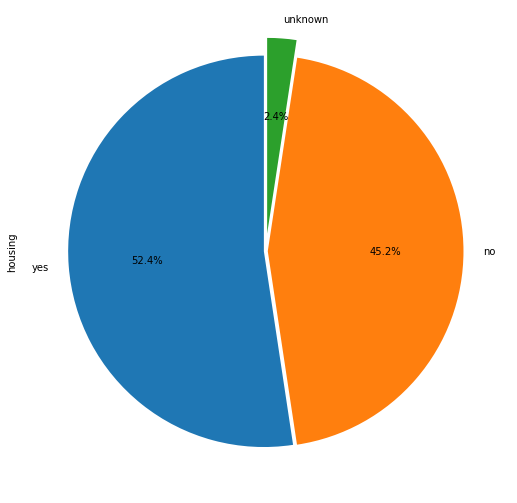

In [76]:
# Graph "pie"
df['housing'].value_counts(dropna=False).plot(kind='pie', 
                                              explode = (0.01, 0.01, 0.09), 
                                              figsize=(13,9), 
                                              autopct='%1.1f%%',
                                              startangle=90);

In [77]:
# Number of observations by class
hous_obs = df.housing.value_counts()
hous_o = pd.DataFrame(hous_obs)
hous_o.rename(columns={"housing":"Freq abs"}, inplace=True)
hous_o_pc = (df.housing.value_counts(normalize=True) * 100).round(decimals=2)
hous_obs_pc = pd.DataFrame(hous_o_pc)
hous_obs_pc.rename(columns={"housing":"percent %"}, inplace=True)
hous_obs = pd.concat([hous_o,hous_obs_pc], axis=1)
hous_obs

,Freq abs,percent %
yes,21576,52.38
no,18622,45.21
unknown,990,2.40


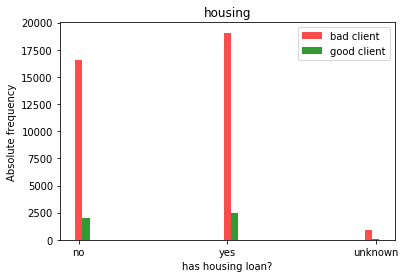

In [78]:
# Graph 'housing' vs. 'target'
housing_0 = df[df.target == 0].iloc[:,5:6]
housing_1 = df[df.target == 1].iloc[:,5:6]

a = np.array(housing_0)
b = np.array(housing_1)

np.warnings.filterwarnings('ignore')

plt.hist(a, bins=40, color="r", alpha = 0.7, label='bad client', align="left")
plt.hist(b, bins=40, color="g", alpha = 0.8, label='good client', align="right")
plt.legend(loc='upper right')
plt.title('housing', fontsize=12)
plt.xlabel('has housing loan?')
plt.xticks(rotation='horizontal')
plt.ylabel('Absolute frequency')
plt.show()

---

### Variable: **loan**

This variable has some similarities with 'housing' in a sense that, proporcionally, 'yes' and 'no' are very even. Once again, it might reduce its predictive power.

In [79]:
# General stats description
stats_loan = {'Designation': ['Value'],
            'Variable': 'loan',
            'Description': 'has personal loan?',
            'Type of variable': df.loan.dtype,
            'Total observations': df.loan.shape[0],
            'Unique values': df.loan.nunique(),
           }

st_loan = pd.DataFrame(stats_loan, columns = ['Designation', 
                                     'Variable',
                                     'Description',
                                     'Type of variable',
                                     'Total observations',
                                     'Unique values',
                                        ])
st_loan.set_index("Designation", inplace=True)

results = st_loan.T
resultsT = st_loan
display(results)
print(f"List of unique values: {df.loan.unique()}")

Designation,Value
Variable,loan
Description,has personal loan?
Type of variable,object
Total observations,41188
Unique values,3


List of unique values: ['no' 'yes' 'unknown']


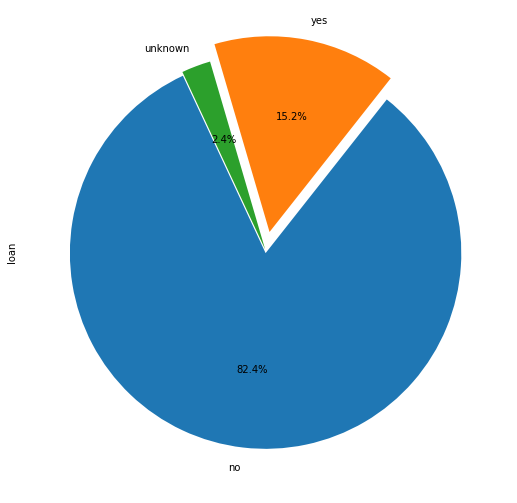

In [80]:
# Graph "pie"
df['loan'].value_counts(dropna=False).plot(kind='pie', 
                                                figsize=(13,9), 
                                                explode = (0.01, 0.1, 0.01),
                                                autopct='%1.1f%%',
                                                startangle=115);

In [81]:
# Number of observations by class
loan_obs = df.loan.value_counts()
loan_o = pd.DataFrame(loan_obs)
loan_o.rename(columns={"loan":"Freq abs"}, inplace=True)
loan_o_pc = (df.loan.value_counts(normalize=True) * 100).round(decimals=2)
loan_obs_pc = pd.DataFrame(loan_o_pc)
loan_obs_pc.rename(columns={"loan":"percent %"}, inplace=True)
loan_obs = pd.concat([loan_o,loan_obs_pc], axis=1)
loan_obs

,Freq abs,percent %
no,33950,82.43
yes,6248,15.17
unknown,990,2.40


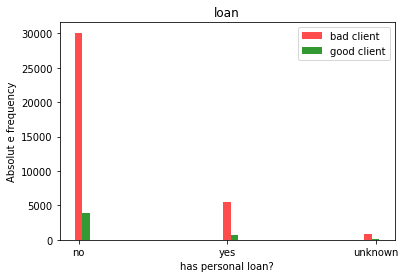

In [82]:
# Graph 'loan' vs. 'target'
loan_0 = df[df.target == 0].iloc[:,6:7]
loan_1 = df[df.target == 1].iloc[:,6:7]

a = np.array(loan_0)
b = np.array(loan_1)

np.warnings.filterwarnings('ignore')

plt.hist(a, bins=40, color="r", alpha = 0.7, label='bad client', align="left")
plt.hist(b, bins=40, color="g", alpha = 0.8, label='good client', align="right")
plt.legend(loc='upper right')
plt.title('loan', fontsize=12)
plt.xlabel('has personal loan?')
plt.xticks(rotation='horizontal')
plt.ylabel('Absolut e frequency')
plt.show()

---

### Variable: **poutcome**

With 3 unique values, 'outcome' reveals a very interesting fact: between the clients previously contacted from other promotional campaigns that actually succeded, the majority subscribed this time.

In [83]:
# General stats description
stats_poutcome = {'Designation': ['Value'],
            'Variable': 'poutcome',
            'Description': 'outcome of the previous marketing campaign',
            'Type of variable': df.poutcome.dtype,
            'Total observations': df.poutcome.shape[0],
            'Unique values': df.poutcome.nunique(),
           }

st_poutcome = pd.DataFrame(stats_poutcome, columns = ['Designation', 
                                     'Variable',
                                     'Description',
                                     'Type of variable',
                                     'Total observations',
                                     'Unique values',
                                        ])
st_poutcome.set_index("Designation", inplace=True)

results = st_poutcome.T
resultsT = st_poutcome
display(results)
print(f"List of unique values: {df.poutcome.unique()}")

Designation,Value
Variable,poutcome
Description,outcome of the previous marketing campaign
Type of variable,object
Total observations,41188
Unique values,3


List of unique values: ['nonexistent' 'failure' 'success']


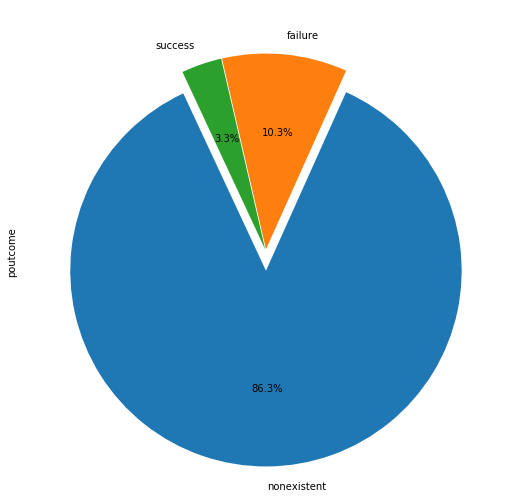

In [84]:
# Graph "pie"
df['poutcome'].value_counts(dropna=False).plot(kind='pie', 
                                                figsize=(13,9), 
                                                explode = (0.1, 0.01, 0.01),
                                                autopct='%1.1f%%',
                                                startangle=115);

In [85]:
# Number of observations by class
pout_obs = df.poutcome.value_counts()
pout_o = pd.DataFrame(pout_obs)
pout_o.rename(columns={"poutcome":"Freq abs"}, inplace=True)
pout_o_pc = (df.poutcome.value_counts(normalize=True) * 100).round(decimals=2)
pout_obs_pc = pd.DataFrame(pout_o_pc)
pout_obs_pc.rename(columns={"poutcome":"percent %"}, inplace=True)
pout_obs = pd.concat([pout_o,pout_obs_pc], axis=1)
pout_obs

,Freq abs,percent %
nonexistent,35563,86.34
failure,4252,10.32
success,1373,3.33


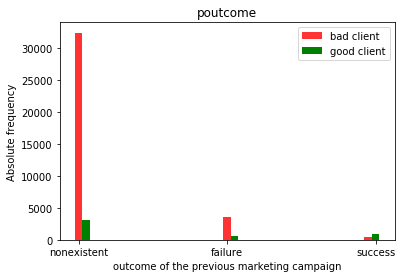

In [86]:
# Pivot_table
type_pivot = df.pivot_table(
    columns="target",
    index="poutcome",
    values="age", aggfunc=np.mean)

# Graph 'default' vs. 'target'
pout_0 = df[df.target == 0].iloc[:,9:10]
pout_1 = df[df.target == 1].iloc[:,9:10]

a = np.array(pout_0)
b = np.array(pout_1)

np.warnings.filterwarnings('ignore')

plt.hist(a, bins=40, color="r", alpha = 0.8, label='bad client', align="left")
plt.hist(b, bins=40, color="g", alpha = 1, label='good client', align="right")
plt.legend(loc='upper right')
plt.title('poutcome', fontsize=12)
plt.xlabel('outcome of the previous marketing campaign')
plt.xticks(rotation='horizontal')
plt.ylabel('Absolute frequency')
plt.show()


### **What are the most common categories?**

The detailed analysis of the categoric variables gave us a ton of information about the data, the customers and their profiles, the variables behaviour. Let's take a panoramic view over the most comum categories seen above.

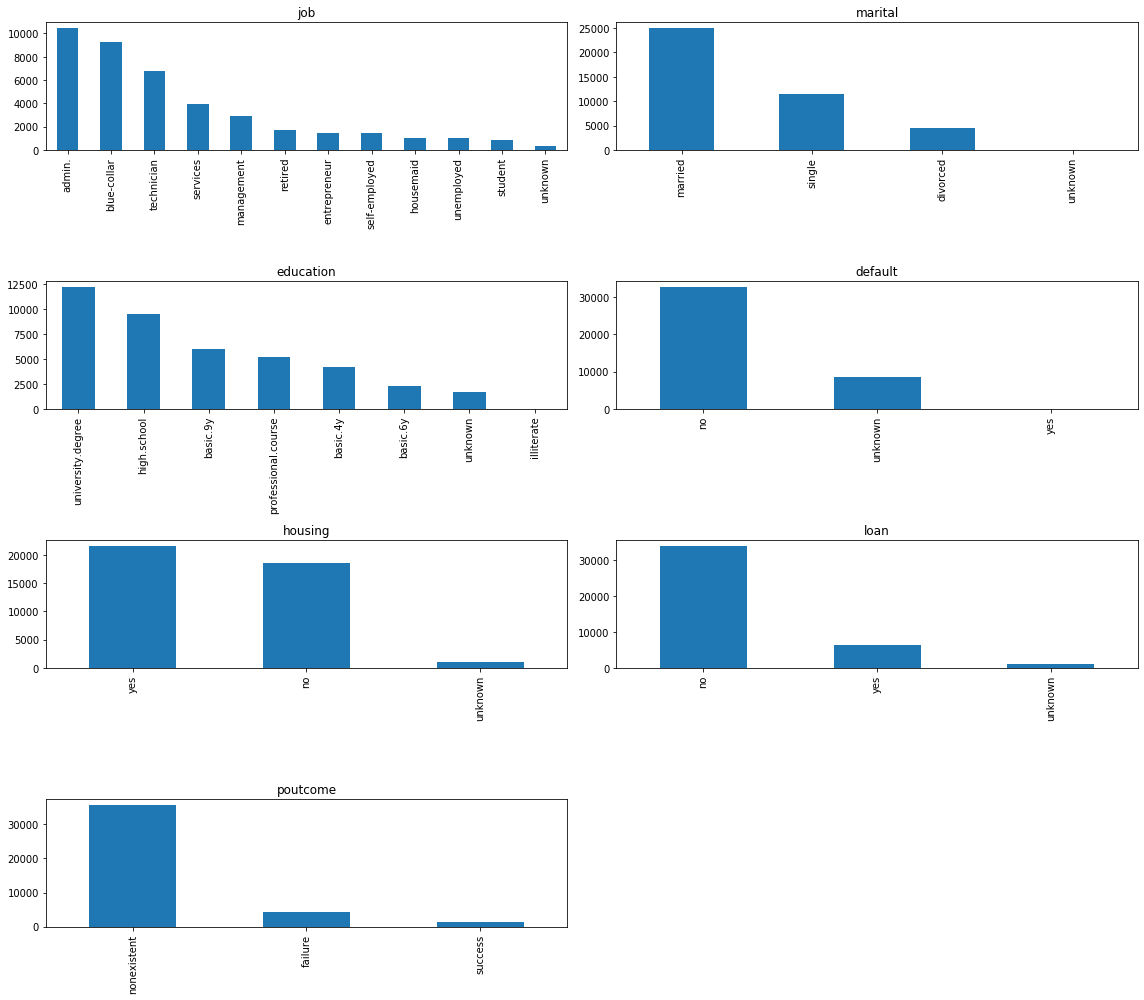

In [93]:
n = len(cat_features)
i=1
plt.figure(figsize=(16,14))

for feature in df[cat_features]:
    plt.subplot(round(n/2),round(n/3), i)
    df[feature].value_counts().plot.bar()
    plt.xticks(rotation=90)
    plt.title(feature)
    i+=1
plt.savefig('cat_com.png')
plt.tight_layout();

**Most common:**

- job: administrative
- marital state: married
- education: university degree
- credit in defaut: no
- housing: yes, however does not have house is very close
- loan: no
- poutcome: did not participate in previous campaign

*Notice that all the feature includes that category 'unknown' except for the 'poutcome' variable.*

### **How these categories influence target variable?**

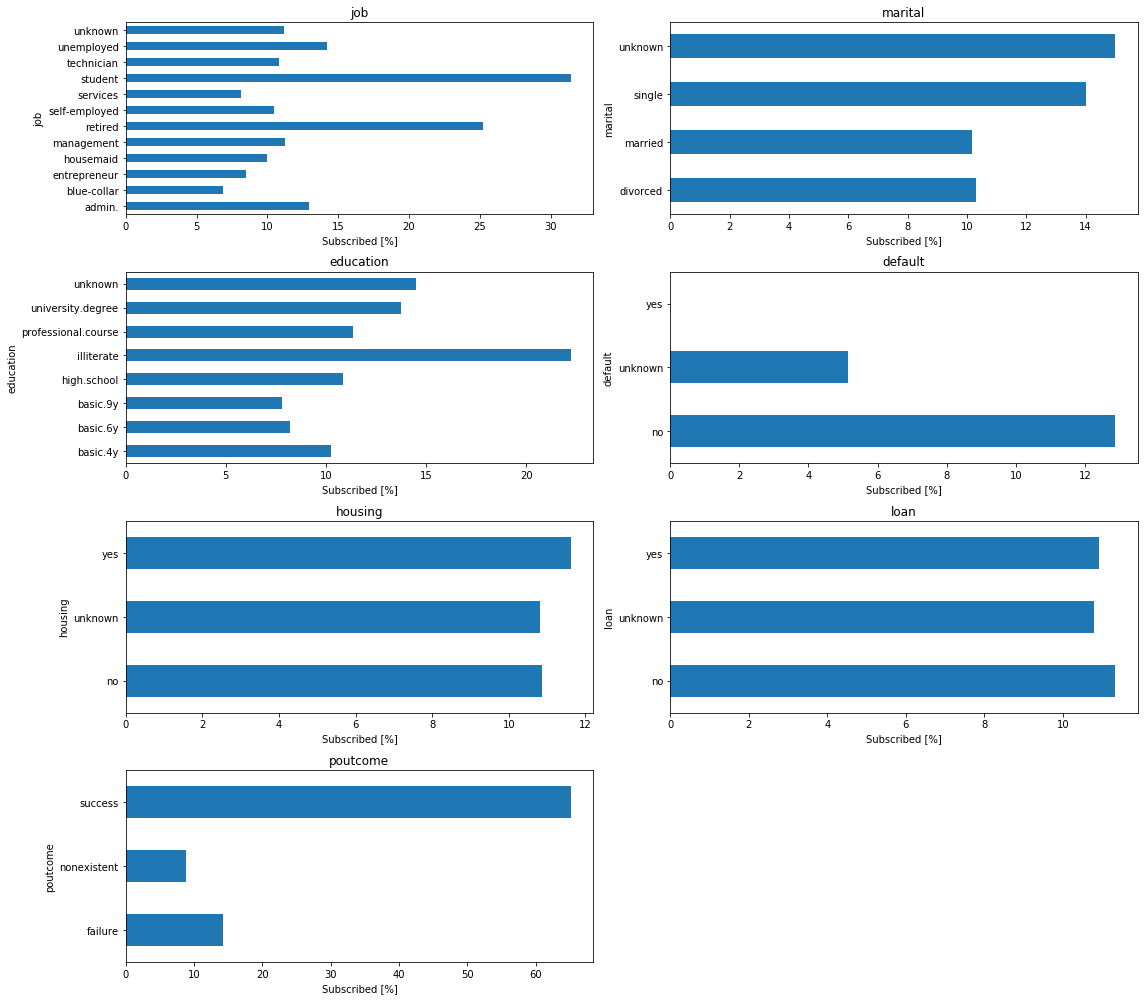

In [88]:
n = len(cat_features)
i=1
plt.figure(figsize=(16,14))

for feature in df[cat_features]:
    plt.subplot(round(n/2),round(n/3), i)
    df.groupby([feature])['target'].mean().multiply(100).plot.barh()
    plt.xlabel('Subscribed [%]')
    plt.title(feature)
    i+=1

plt.tight_layout()
plt.show()

**Observations:**

- 'Student' and 'retired' have the highest percentage of subscriptions (>25%) whereas 'bue-collar' and 'services' have the lowest.
- 'Iliterate' people have the highest percentage of subscriptions (>20%), on the other hand 'basic 9y', 'basic 6y' and 'basic 4y' have the lowest.
- People with credit in default did not subscribed.
- More than 60% of the people previously contacted to other campaigns subscribed.
- Marital state, existance of loans and housing does not influence much the subscription rate.

## **Conclusion**

In this article, I've focused on how to begin a machine learning project strarting by one of the most important parts which allows us to look beyond the data, the Exploratory Data Analysis or EDA. This is a very important section - and where a Data Scientist or Analyst would spend around 80% of time - of any data science project because, let me put it this way, if you don't feel and deeply understand the data you're about to be dealing with, it will be a total mess.

This was the first of three parts. In the next section of this project (next article) I'll be doing feature engeneering and feature selection but before that cleaning the whole dataset and taking care of all anomalies we might find along the way as well as imputations and transformations, are absolutely crucial and something that must be done. This is another very important procedure in any machine learning project as without it one could compromise accuracy and other evaluation and performance metrics, promote over-fitting and reduce training time.

In the last part (third article) we'll be doing the most exciting part as we are going to train some machine learning models in order to choose the best one and find out the most important features in predicting the minim costs for the marketing campaign.

I really hope you enjoyed reading this article as much as I enjoyed writting it.

- You will find the entire code of this project [here](https://bit.ly/3hmI3YS)

---

**Author**: Gonçalo Guimarães Gomes. Portuguese. Data Analyst and Digital Brand Marketer. Postgraduate in Data Science and in Digital Marketing. 5 yrs Degree and Executive Master in Marketing Management.

### **Contacts**

Feel free to contact me:
- [Linkedin](https://www.linkedin.com/in/goncaloggomes/)
- [Twitter](https://twitter.com/goncaloggomes)
- [Medium Profile](https://medium.com/@goncaloggomes)
- [GitHub](https://github.com/goncaloggomes)
- [Email](mailto:goncaloggomes@gmail.com)